In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
!pip install xgboost
!pip install catboost
!pip install pycaret==2.3.2
!pip install scikit-learn==0.24.2
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 11.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 57.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metad

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(f'train data set은 {train.shape[1]}개의 feature를 가진 {train.shape[0]}개의 데이터 샘플로 이루어져 있습니다.')
train.head()

train data set은 184개의 feature를 가진 2207개의 데이터 샘플로 이루어져 있습니다.


,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [ ]:
print(f'test data set은 {test.shape[1]}개의 feature를 가진 {test.shape[0]}개의 데이터 샘플로 이루어져 있습니다.')
test.head()

test data set은 183개의 feature를 가진 2208개의 데이터 샘플로 이루어져 있습니다.


,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [ ]:
print(train.shape, test.shape)

(2207, 184) (2208, 183)


In [ ]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [ ]:
cols = []
for col in train.columns:
    if '새순' in col or '착과량' in col:
        cols.append(col)
sprout = train.loc[:, cols]
sprout

,착과량(int),2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,692,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,534,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,634,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,639,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,496,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,611,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,650,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,363,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [ ]:
cols = []
for col in train.columns:
    if '엽록' in col or '착과량' in col:
        cols.append(col)
chlorophyll = train.loc[:, cols]
chlorophyll

,착과량(int),2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,692,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,534,80.116691,79.974397,79.890399,79.709278,79.531061,79.348139,79.151023,79.128739,79.084197,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,634,79.118529,78.941452,78.928197,78.741878,78.713691,78.654247,78.461743,78.323264,78.219696,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,639,77.936262,77.839523,77.815607,77.644644,77.546555,77.480441,77.383665,77.282036,77.126354,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,496,76.233231,76.186572,76.031032,75.886553,75.736449,75.735036,75.642223,75.458496,75.380945,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,74.024614,73.876933,73.853205,73.721799,73.666974,73.540144,73.449933,73.349051,73.310852,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,611,81.920876,81.898801,81.769536,81.607251,81.456723,81.408951,81.312932,81.181893,81.027196,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,650,75.486518,75.451905,75.315223,75.252547,75.186170,75.099348,75.093451,75.050447,74.877088,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,363,74.110017,74.017373,73.886675,73.720486,73.712709,73.532512,73.352104,73.230786,73.183439,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


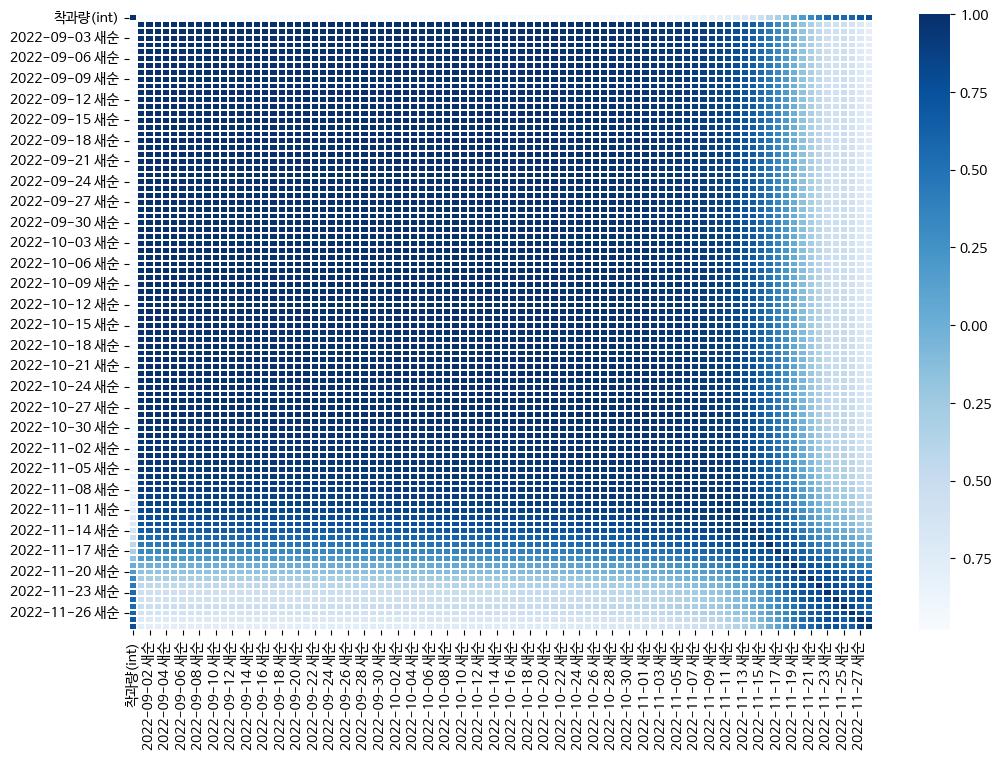

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (12, 8))
x = sns.heatmap(sprout.corr(), cmap = 'Blues', linewidths = '0.1',annot = False)

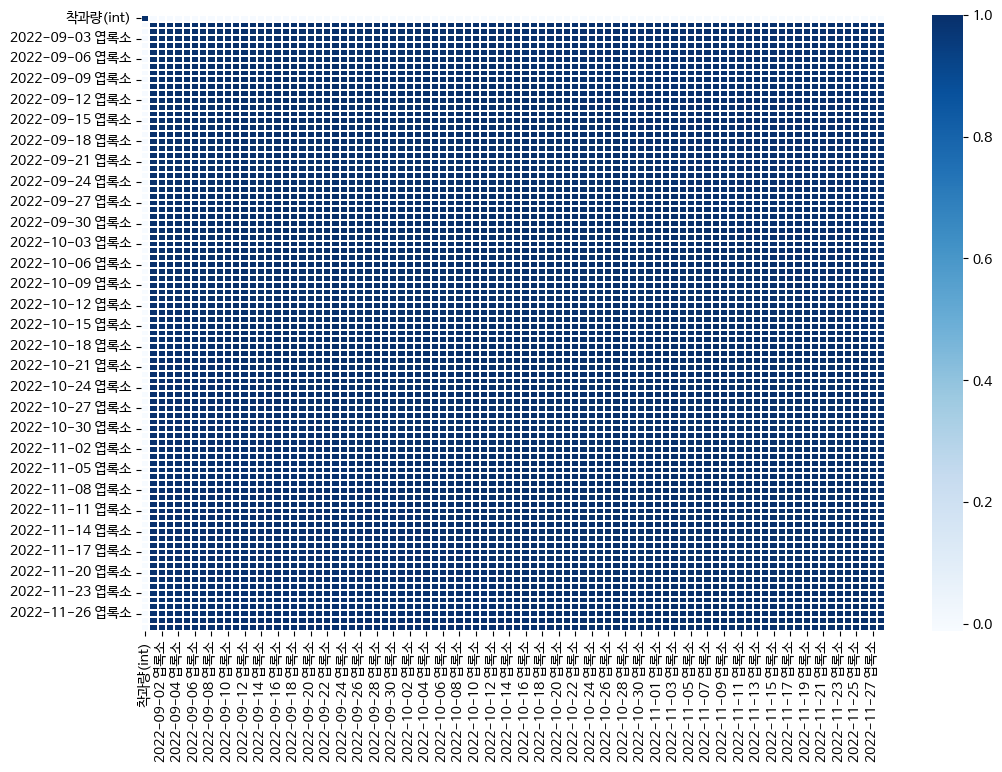

In [ ]:
plt.figure(figsize = (12, 8))
x = sns.heatmap(chlorophyll.corr(), cmap = 'Blues', linewidths = '0.1',annot = False)

In [ ]:
train['새순1'] = train.iloc[:, 6:11].mean(axis=1)
train['새순2'] = train.iloc[:, 11:16].mean(axis=1)
train['새순3'] = train.iloc[:, 16:21].mean(axis=1)
train['새순4'] = train.iloc[:, 21:26].mean(axis=1)
train['새순5'] = train.iloc[:, 26:31].mean(axis=1)
train['새순6'] = train.iloc[:, 31:36].mean(axis=1)
train['새순7'] = train.iloc[:, 36:41].mean(axis=1)
train['새순8'] = train.iloc[:, 41:46].mean(axis=1)
train['새순9'] = train.iloc[:, 46:51].mean(axis=1)
train['새순10'] = train.iloc[:, 51:56].mean(axis=1)
train['새순11'] = train.iloc[:, 56:61].mean(axis=1)
train['새순12'] = train.iloc[:, 61:66].mean(axis=1)
train['새순13'] = train.iloc[:, 66:71].mean(axis=1)
train['새순14'] = train.iloc[:, 71:76].mean(axis=1)
train['새순15'] = train.iloc[:, 76:81].mean(axis=1)
train['새순16'] = train.iloc[:, 81:86].mean(axis=1)
train['새순17'] = train.iloc[:, 86:91].mean(axis=1)
train['새순18'] = train.iloc[:, 91:95].mean(axis=1)
train = train.drop(train.columns[6:95], axis=1)
train['엽록소1'] = train.iloc[:, 6:11].mean(axis=1)
train['엽록소2'] = train.iloc[:, 11:16].mean(axis=1)
train['엽록소3'] = train.iloc[:, 16:21].mean(axis=1)
train['엽록소4'] = train.iloc[:, 21:26].mean(axis=1)
train['엽록소5'] = train.iloc[:, 26:31].mean(axis=1)
train['엽록소6'] = train.iloc[:, 31:36].mean(axis=1)
train['엽록소7'] = train.iloc[:, 36:41].mean(axis=1)
train['엽록소8'] = train.iloc[:, 41:46].mean(axis=1)
train['엽록소9'] = train.iloc[:, 46:51].mean(axis=1)
train['엽록소10'] = train.iloc[:, 51:56].mean(axis=1)
train['엽록소11'] = train.iloc[:, 56:61].mean(axis=1)
train['엽록소12'] = train.iloc[:, 61:66].mean(axis=1)
train['엽록소13'] = train.iloc[:, 66:71].mean(axis=1)
train['엽록소14'] = train.iloc[:, 71:76].mean(axis=1)
train['엽록소15'] = train.iloc[:, 76:81].mean(axis=1)
train['엽록소16'] = train.iloc[:, 81:86].mean(axis=1)
train['엽록소17'] = train.iloc[:, 86:91].mean(axis=1)
train['엽록소18'] = train.iloc[:, 91:95].mean(axis=1)
train = train.drop(train.columns[6:95], axis=1)
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순1,새순2,새순3,새순4,...,엽록소9,엽록소10,엽록소11,엽록소12,엽록소13,엽록소14,엽록소15,엽록소16,엽록소17,엽록소18
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.74,2.62,2.48,2.36,...,74.421652,73.800845,73.300475,72.981747,72.455088,72.072320,71.561218,71.054385,70.581899,70.192336
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.26,3.06,2.92,2.76,...,74.751240,74.164677,73.650808,73.424797,73.109873,72.655852,72.042626,71.602423,71.096162,70.537685
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2.92,2.78,2.64,2.52,...,74.927285,74.449649,74.032300,73.634263,73.205652,72.721754,72.035522,71.494388,71.033418,70.530970
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.02,2.86,2.72,2.56,...,73.905289,73.151168,72.623141,72.157215,71.603909,71.146025,70.638339,70.092745,69.783789,69.277413
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.60,3.42,3.24,3.06,...,72.123303,71.685749,71.185331,70.491783,69.836836,69.286081,68.756803,68.425281,68.120946,67.597837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.54,4.28,4.02,3.80,...,69.959485,69.463594,68.989430,68.605635,68.139520,67.671161,67.262848,66.628347,66.156390,65.692736
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.00,2.86,2.74,2.56,...,77.409172,76.939138,76.534594,76.098523,75.480492,74.915719,74.351714,73.655748,73.295398,73.009424
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,2.94,2.82,2.66,2.54,...,71.599481,71.144504,70.525775,69.966471,69.453560,68.891551,68.232614,67.824800,67.219316,66.573045
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.84,3.64,3.44,3.26,...,70.132924,69.693800,69.346059,68.874272,68.366969,67.976682,67.525794,67.027613,66.404074,66.014639


In [ ]:
train['수관폭 Max-Min'] = train.iloc[:, 4] - train.iloc[:, 3]

train = train.drop(['ID', '수관폭1(min)', '수관폭2(max)'], axis = 1)
train

,착과량(int),수고(m),수관폭평균,새순1,새순2,새순3,새순4,새순5,새순6,새순7,...,엽록소10,엽록소11,엽록소12,엽록소13,엽록소14,엽록소15,엽록소16,엽록소17,엽록소18,수관폭 Max-Min
0,692,275.0,289.5,2.74,2.62,2.48,2.36,2.24,2.12,1.98,...,73.800845,73.300475,72.981747,72.455088,72.072320,71.561218,71.054385,70.581899,70.192336,5.0
1,534,293.0,310.0,3.26,3.06,2.92,2.76,2.64,2.46,2.30,...,74.164677,73.650808,73.424797,73.109873,72.655852,72.042626,71.602423,71.096162,70.537685,52.0
2,634,300.0,421.0,2.92,2.78,2.64,2.52,2.36,2.24,2.10,...,74.449649,74.032300,73.634263,73.205652,72.721754,72.035522,71.494388,71.033418,70.530970,58.0
3,639,289.0,373.5,3.02,2.86,2.72,2.56,2.44,2.28,2.16,...,73.151168,72.623141,72.157215,71.603909,71.146025,70.638339,70.092745,69.783789,69.277413,11.0
4,496,306.0,355.5,3.60,3.42,3.24,3.06,2.86,2.70,2.54,...,71.685749,71.185331,70.491783,69.836836,69.286081,68.756803,68.425281,68.120946,67.597837,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,230.0,360.0,4.54,4.28,4.02,3.80,3.56,3.32,3.08,...,69.463594,68.989430,68.605635,68.139520,67.671161,67.262848,66.628347,66.156390,65.692736,14.0
2203,611,266.0,368.5,3.00,2.86,2.74,2.56,2.44,2.32,2.16,...,76.939138,76.534594,76.098523,75.480492,74.915719,74.351714,73.655748,73.295398,73.009424,63.0
2204,650,237.0,357.5,2.94,2.82,2.66,2.54,2.38,2.24,2.12,...,71.144504,70.525775,69.966471,69.453560,68.891551,68.232614,67.824800,67.219316,66.573045,9.0
2205,363,281.0,370.0,3.84,3.64,3.44,3.26,3.04,2.86,2.66,...,69.693800,69.346059,68.874272,68.366969,67.976682,67.525794,67.027613,66.404074,66.014639,66.0


In [ ]:
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(train)
col = ['착과량(int)', '수고(m)', '수관폭평균', '새순1', '새순2', '새순3', '새순4', '새순5', '새순6',
       '새순7', '새순8', '새순9', '새순10', '새순11', '새순12', '새순13', '새순14', '새순15',
       '새순16', '새순17', '새순18', '엽록소1', '엽록소2', '엽록소3', '엽록소4', '엽록소5', '엽록소6',
       '엽록소7', '엽록소8', '엽록소9', '엽록소10', '엽록소11', '엽록소12', '엽록소13', '엽록소14',
       '엽록소15', '엽록소16', '엽록소17', '엽록소18', '수관폭 Max-Min']
normalized_train = pd.DataFrame(normalized_data, columns = col)
normalized_train

,착과량(int),수고(m),수관폭평균,새순1,새순2,새순3,새순4,새순5,새순6,새순7,...,엽록소10,엽록소11,엽록소12,엽록소13,엽록소14,엽록소15,엽록소16,엽록소17,엽록소18,수관폭 Max-Min
0,0.865915,0.629371,0.390270,0.173333,0.177305,0.172932,0.178862,0.175439,0.182692,0.178947,...,0.561471,0.560900,0.567836,0.567885,0.572671,0.571449,0.572895,0.572825,0.576338,0.128440
1,0.667920,0.692308,0.434595,0.346667,0.333333,0.338346,0.341463,0.350877,0.346154,0.347368,...,0.574083,0.572952,0.583075,0.590365,0.592825,0.588113,0.591787,0.590571,0.588284,0.272171
2,0.793233,0.716783,0.674595,0.233333,0.234043,0.233083,0.243902,0.228070,0.240385,0.242105,...,0.583962,0.586076,0.590280,0.593654,0.595101,0.587867,0.588063,0.588406,0.588052,0.290520
3,0.799499,0.678322,0.571892,0.266667,0.262411,0.263158,0.260163,0.263158,0.259615,0.273684,...,0.538949,0.537599,0.539475,0.538662,0.540679,0.539504,0.539746,0.545285,0.544689,0.146789
4,0.620301,0.737762,0.532973,0.460000,0.460993,0.458647,0.463415,0.447368,0.461538,0.473684,...,0.488148,0.488137,0.482191,0.477993,0.476442,0.474375,0.482266,0.487906,0.486591,0.128440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,0.147870,0.472028,0.542703,0.773333,0.765957,0.751880,0.764228,0.754386,0.759615,0.757895,...,0.411114,0.412595,0.417314,0.419720,0.420666,0.422663,0.420322,0.420116,0.420691,0.155963
2203,0.764411,0.597902,0.561081,0.260000,0.262411,0.270677,0.260163,0.263158,0.278846,0.273684,...,0.670264,0.672158,0.675042,0.671755,0.670875,0.668042,0.662568,0.666459,0.673784,0.305810
2204,0.813283,0.496503,0.537297,0.240000,0.248227,0.240602,0.252033,0.236842,0.240385,0.252632,...,0.469385,0.465447,0.464122,0.464835,0.462815,0.456231,0.461566,0.456794,0.451142,0.140673
2205,0.453634,0.650350,0.564324,0.540000,0.539007,0.533835,0.544715,0.526316,0.538462,0.536842,...,0.419095,0.424864,0.426554,0.427529,0.431218,0.431764,0.434086,0.428662,0.431826,0.314985


In [ ]:
y_target = train['착과량(int)']
x_data = normalized_train.drop(['착과량(int)'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1765, 39) (442, 39) (1765,) (442,)


In [ ]:
params ={
    'n_estimators':[50, 100, 200, 300, 400, 500],
    'max_depth':[6, 8, 10, 12, 16],
    'min_samples_leaf':[4, 8, 12, 16],
    'min_samples_split':[4, 8, 12, 16, 20]
}

rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

KeyboardInterrupt: ignored

In [ ]:
model = RandomForestRegressor(n_estimators = 50, max_depth = 10, min_samples_leaf = 16, min_samples_split = 16, random_state=42, oob_score=True)
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 0.978
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.970


In [ ]:
params ={
    'n_estimators':[50, 100, 200, 300, 400, 500],
    'learning_rate':[0.1, 0.2, 0.3],
    'gamma':[0, 1, 2],
    'subsample':[0.3, 0.5, 0.7],
    'max_depth':[4, 5, 6, 7, 8]
}

xgbr = xgb.XGBRegressor()
grid_cv = GridSearchCV(xgbr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}
최고 예측 정확도: 0.9688


In [ ]:
xgbmodel = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, gamma=0, subsample=0.75, max_depth=4, random_state=42)
xgbmodel.fit(x_train, y_train)

pred = model.predict(x_test)

print("훈련 세트 정확도: {:.3f}".format(xgbmodel.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(xgbmodel.score(x_test, y_test)) )

훈련 세트 정확도: 0.980
테스트 세트 정확도: 0.967


In [ ]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                           colsample_bytree=0.8,
                           learning_rate=0.3,
                           max_depth=6,
                           n_estimators=100,
                           subsample=0.9,
                           min_child_weight=1,
                          scale_pos_weight=1,
                           seed=1)

xgb_reg.fit(x_data, y_target, eval_set=[(x_data, y_target)], early_stopping_rounds=300, verbose=False)

XGBRegressor(colsample_bytree=0.86, eta=0.01, learning_rate=0.3, max_depth=6,
             objective='reg:squarederror', seed=1, subsample=0.9)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.86, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))

    return score

y_hat = xgb_reg.predict(x_data) # y예측
print(f'모델 NMAE: {nmae(y_target,y_hat)}')

모델 NMAE: 0.013516019886116577


In [ ]:
check_missing_col(test)

cols = []
for col in test.columns:
    if '새순' in col or '착과량' in col:
        cols.append(col)
sprout = test.loc[:, cols]

cols = []
for col in test.columns:
    if '엽록' in col or '착과량' in col:
        cols.append(col)
chlorophyll = test.loc[:, cols]

test['새순1'] = test.iloc[:, 6:11].mean(axis=1)
test['새순2'] = test.iloc[:, 11:16].mean(axis=1)
test['새순3'] = test.iloc[:, 16:21].mean(axis=1)
test['새순4'] = test.iloc[:, 21:26].mean(axis=1)
test['새순5'] = test.iloc[:, 26:31].mean(axis=1)
test['새순6'] = test.iloc[:, 31:36].mean(axis=1)
test['새순7'] = test.iloc[:, 36:41].mean(axis=1)
test['새순8'] = test.iloc[:, 41:46].mean(axis=1)
test['새순9'] = test.iloc[:, 46:51].mean(axis=1)
test['새순10'] = test.iloc[:, 51:56].mean(axis=1)
test['새순11'] = test.iloc[:, 56:61].mean(axis=1)
test['새순12'] = test.iloc[:, 61:66].mean(axis=1)
test['새순13'] = test.iloc[:, 66:71].mean(axis=1)
test['새순14'] = test.iloc[:, 71:76].mean(axis=1)
test['새순15'] = test.iloc[:, 76:81].mean(axis=1)
test['새순16'] = test.iloc[:, 81:86].mean(axis=1)
test['새순17'] = test.iloc[:, 86:91].mean(axis=1)
test['새순18'] = test.iloc[:, 91:95].mean(axis=1)
test = test.drop(test.columns[6:95], axis=1)
test['엽록소1'] = test.iloc[:, 6:11].mean(axis=1)
test['엽록소2'] = test.iloc[:, 11:16].mean(axis=1)
test['엽록소3'] = test.iloc[:, 16:21].mean(axis=1)
test['엽록소4'] = test.iloc[:, 21:26].mean(axis=1)
test['엽록소5'] = test.iloc[:, 26:31].mean(axis=1)
test['엽록소6'] = test.iloc[:, 31:36].mean(axis=1)
test['엽록소7'] = test.iloc[:, 36:41].mean(axis=1)
test['엽록소8'] = test.iloc[:, 41:46].mean(axis=1)
test['엽록소9'] = test.iloc[:, 46:51].mean(axis=1)
test['엽록소10'] = test.iloc[:, 51:56].mean(axis=1)
test['엽록소11'] = test.iloc[:, 56:61].mean(axis=1)
test['엽록소12'] = test.iloc[:, 61:66].mean(axis=1)
test['엽록소13'] = test.iloc[:, 66:71].mean(axis=1)
test['엽록소14'] = test.iloc[:, 71:76].mean(axis=1)
test['엽록소15'] = test.iloc[:, 76:81].mean(axis=1)
test['엽록소16'] = test.iloc[:, 81:86].mean(axis=1)
test['엽록소17'] = test.iloc[:, 86:91].mean(axis=1)
test['엽록소18'] = test.iloc[:, 91:95].mean(axis=1)
test

결측치가 존재하지 않습니다


,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,...,엽록소9,엽록소10,엽록소11,엽록소12,엽록소13,엽록소14,엽록소15,엽록소16,엽록소17,엽록소18
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,80.164425,80.113400,80.045268,79.909461,...,76.180383,75.623472,74.918677,74.272640,73.801321,73.324332,72.886250,72.282471,71.695922,54.411439
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,75.340482,75.162872,75.144209,75.057688,...,71.742728,71.437592,71.007368,70.307807,69.844878,69.314666,68.903090,68.517249,68.030989,51.285336
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,82.023651,81.947837,81.760369,81.721403,...,77.671209,77.179762,76.861159,76.495220,76.116655,75.541811,75.043011,74.482012,73.903491,56.158877
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,81.091141,81.034231,80.946649,80.801749,...,76.815403,76.322258,75.937226,75.550398,75.096476,74.593654,74.083634,73.693619,73.068871,55.402148
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,80.545367,80.358104,80.210115,80.043960,...,75.910344,75.440843,74.791631,74.177136,73.642787,73.280172,72.817125,72.338880,71.828147,54.227245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.0,265.0,288.0,276.5,2.5,78.353908,78.230912,78.178302,78.009080,...,74.656971,74.125577,73.499640,72.970536,72.441671,71.949018,71.324171,70.730625,70.138532,52.882709
2204,TEST_2204,182.0,191.0,262.0,226.5,4.1,74.368141,74.363525,74.220958,74.113977,...,70.431921,69.842842,69.277782,68.880050,68.358187,67.977076,67.323733,66.696907,66.180153,50.314279
2205,TEST_2205,254.0,280.0,332.0,306.0,3.8,70.925254,70.762352,70.576459,70.507247,...,66.605721,66.266650,65.860411,65.414901,64.868590,64.493574,63.979885,63.370606,62.703272,47.697278
2206,TEST_2206,257.0,285.0,297.0,291.0,4.5,72.348638,72.157166,72.127472,72.071533,...,68.519835,67.961309,67.312559,66.729876,66.141447,65.616733,64.886814,64.425266,63.893315,48.714359


In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(x_test, y_test)

y_pred = xgb_model.predict(x_test)
y_pred[0:5]

array([547.9086 , 195.97917, 254.13979, 418.04645, 702.13916],
      dtype=float32)

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission_df = pd.DataFrame(submission)
submission_df.reset_index(drop=True, inplace=True)

submission_df['ID'] = submission['ID']

submission_df['착과량(int)'] = np.zeros(len(submission_df))

columns_to_drop = ['ID', '수관폭1(min)', '수관폭2(max)']
test = test.drop(columns_to_drop, axis=1, errors='ignore')

generated_columns = ["새순1", "새순2", "새순3", "새순4", "새순5", "새순6", "새순7", "새순8", "새순9", "새순10", "새순11", "새순12", "새순13", "새순14", "새순15", "새순16", "새순17", "새순18", "엽록소1", "엽록소2", "엽록소3", "엽록소4", "엽록소5", "엽록소6", "엽록소7", "엽록소8", "엽록소9", "엽록소10", "엽록소11", "엽록소12", "엽록소13", "엽록소14", "엽록소15", "엽록소16", "엽록소17", "엽록소18"]

for col in generated_columns:
    if col not in test.columns:
        test[col] = 0

test['수관폭 Max-Min'] = test.iloc[:, 4] - test.iloc[:, 3]

test_features = test[x_train.columns]

y_pred = xgb_model.predict(test_features)

submission_df['착과량(int)'] = y_pred
submission_df.to_csv('sample_submission.csv', index=False)

submission_df

,ID,착과량(int)
0,TEST_0000,63.737232
1,TEST_0001,63.802799
2,TEST_0002,63.737232
3,TEST_0003,63.737232
4,TEST_0004,64.751740
...,...,...
2203,TEST_2203,63.802799
2204,TEST_2204,63.737232
2205,TEST_2205,64.751740
2206,TEST_2206,63.737232


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 

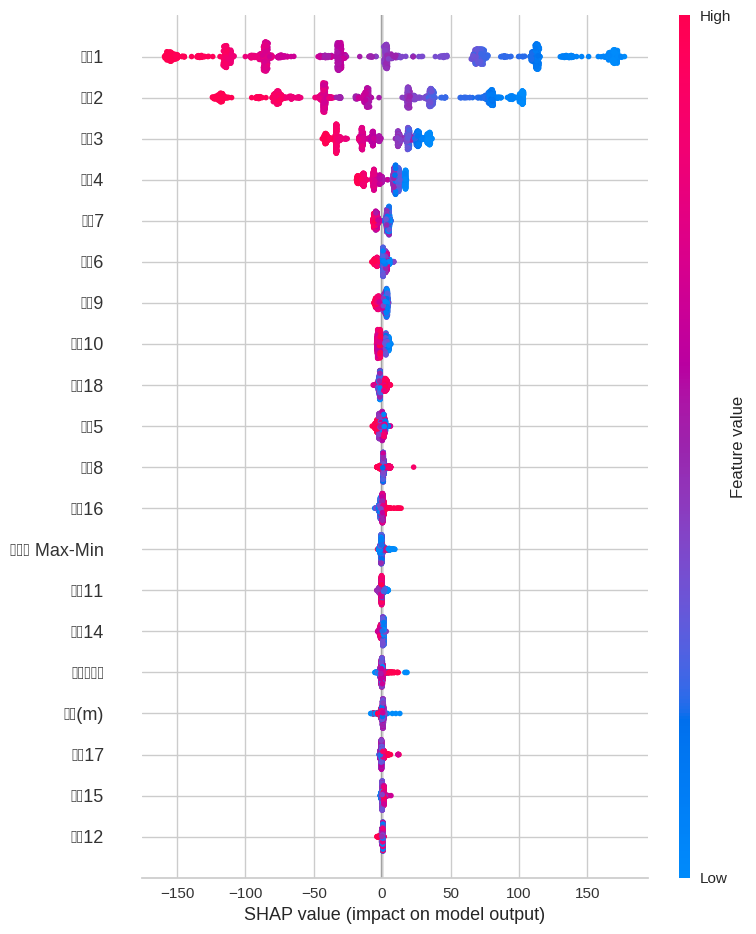

,Description,Value
0,Session id,4235
1,Target,착과량(int)
2,Target type,Regression
3,Original data shape,"(2207, 40)"
4,Transformed data shape,"(2207, 40)"
5,Transformed train set shape,"(1544, 40)"
6,Transformed test set shape,"(663, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,31.3188,1520.9047,38.9080,0.9687,0.3499,0.3905,1.0540
ada,AdaBoost Regressor,31.6036,1577.0210,39.5819,0.9675,0.3778,0.4513,0.1660
rf,Random Forest Regressor,31.4828,1579.5733,39.6481,0.9674,0.3392,0.3516,2.7290
et,Extra Trees Regressor,31.8301,1611.3373,40.0558,0.9668,0.3420,0.3588,1.3700
catboost,CatBoost Regressor,32.7299,1648.6182,40.5335,0.9660,0.3594,0.3774,9.2620
lightgbm,Light Gradient Boosting Machine,32.3284,1667.2032,40.7304,0.9657,0.3435,0.3692,2.3880
xgboost,Extreme Gradient Boosting,33.3397,1818.0806,42.5521,0.9625,0.3728,0.3973,0.9840
omp,Orthogonal Matching Pursuit,35.0876,1827.4963,42.6911,0.9623,0.3893,0.4725,0.0420
llar,Lasso Least Angle Regression,35.1142,1834.6071,42.7719,0.9622,0.3973,0.4811,0.0570
br,Bayesian Ridge,35.3166,1837.4916,42.7897,0.9622,0.3891,0.4683,0.0980


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
#!pip install shap
#!pip install pycaret
#!pip install --upgrade scipy
#!pip install CatBoostRegressor
import shap
from pycaret.regression import *
from catboost import CatBoostRegressor

# XGBoost 모델 학습
xgb_model = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, gamma=0, subsample=0.75, max_depth=4, random_state=42)
xgb_model.fit(x_train, y_train)

# SHAP values 계산
explainer = shap.Explainer(xgb_model)
shap_values_train = explainer.shap_values(x_train)

# SHAP summary plot
shap.summary_plot(shap_values_train, x_train)

# pycaret 설정

exp1 = setup(data=train, target='착과량(int)')
best_model = compare_models()

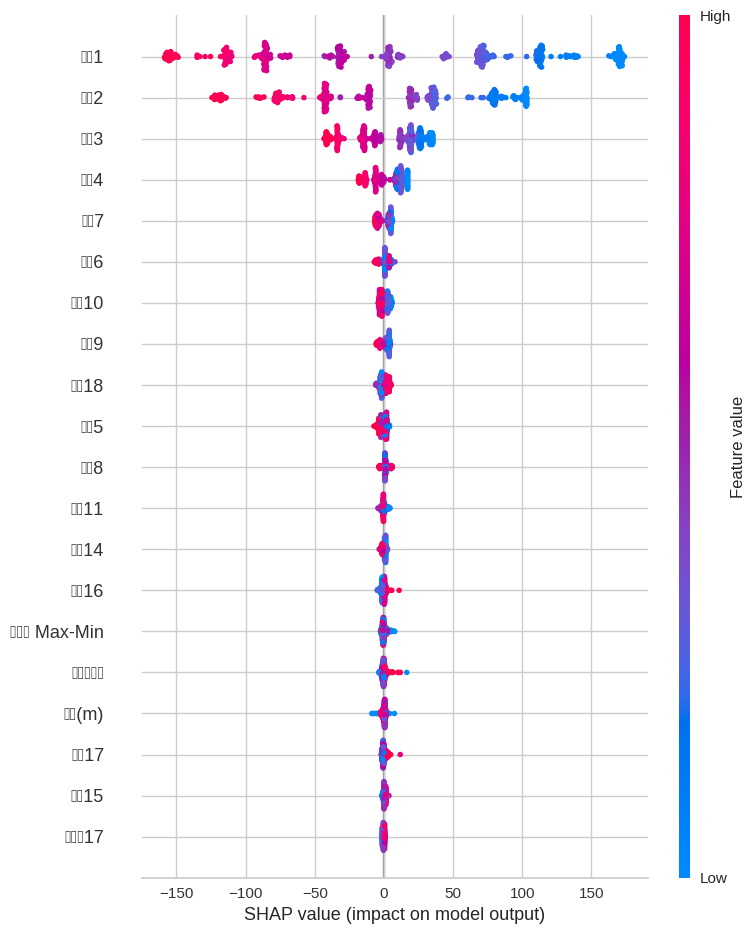

,ID,착과량(int)
0,TEST_0000,260.163253
1,TEST_0001,741.333534
2,TEST_0002,160.426732
3,TEST_0003,458.854079
4,TEST_0004,706.019776
...,...,...
2203,TEST_2203,745.730324
2204,TEST_2204,353.061698
2205,TEST_2205,388.411577
2206,TEST_2206,260.414739


In [ ]:
# SHAP values 계산
final_model = finalize_model(best_model)
shap_values_test = explainer.shap_values(x_test)

# SHAP summary plot 생성
shap.summary_plot(shap_values_test, x_test)

# 테스트 데이터 예측
predictions = predict_model(final_model, data=test)
id_column = submission['ID']
predictions['ID'] = id_column
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]

# 결과 저장
result.to_csv('submission_pycaret_shap.csv', index=False)
result

In [ ]:
gbr = create_model('gbr')
final_model = finalize_model(gbr)
predictions = predict_model(final_model, data=test)
predictions['ID'] = submission['ID']
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]
result.to_csv('submission_pycaret_gbr.csv', index=False)
result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.6356,1243.6091,35.2648,0.9747,0.4232,0.8138
1,33.8625,1765.4035,42.0167,0.9657,0.2784,0.2111
2,30.5893,1345.8627,36.6860,0.9729,0.4961,0.6929
3,30.8119,1485.9798,38.5484,0.9709,0.3295,0.2705
4,29.4585,1321.3863,36.3509,0.9712,0.2867,0.1708
5,31.5007,1501.0118,38.7429,0.9707,0.3273,0.3014
6,30.5137,1430.3575,37.8201,0.9672,0.3959,0.4104
7,33.3738,1837.3439,42.8642,0.9609,0.2052,0.1422
8,34.4498,1859.6147,43.1233,0.9639,0.5383,0.7445


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,ID,착과량(int)
0,TEST_0000,260.163253
1,TEST_0001,741.333534
2,TEST_0002,160.426732
3,TEST_0003,458.854079
4,TEST_0004,706.019776
...,...,...
2203,TEST_2203,746.349094
2204,TEST_2204,353.061698
2205,TEST_2205,388.411577
2206,TEST_2206,260.414739


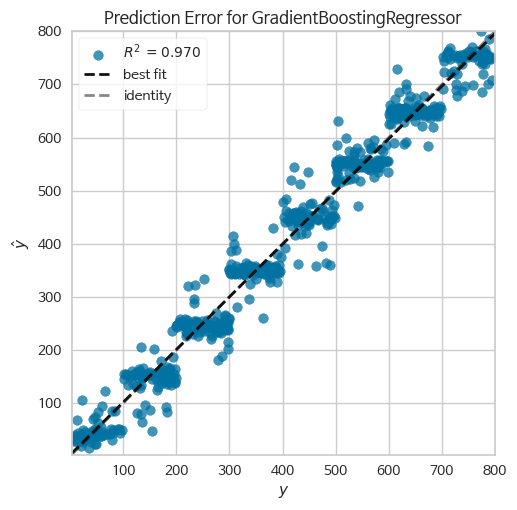

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

gbr = GradientBoostingRegressor()

plot_model(gbr, plot = 'error')

In [ ]:
catboost = create_model('catboost')
final_model = finalize_model(catboost)
predictions = predict_model(final_model, data=test)
predictions['ID'] = submission['ID']
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]
result.to_csv('submission_pycaret_cat.csv', index=False)
result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30.0675,1434.2654,37.8717,0.9708,0.3985,0.7095
1,36.3028,2001.2276,44.7351,0.9611,0.2963,0.2333
2,31.4053,1454.0223,38.1316,0.9707,0.4773,0.6039
3,32.4068,1582.9104,39.7858,0.9690,0.3270,0.2547
4,32.4058,1538.0372,39.2178,0.9664,0.3298,0.1837
5,31.9177,1574.2938,39.6774,0.9692,0.3304,0.2858
6,31.0945,1507.3016,38.8240,0.9655,0.4105,0.4744
7,35.3239,1968.9902,44.3733,0.9581,0.2446,0.1533
8,34.4734,1828.9949,42.7667,0.9645,0.5353,0.7222


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,ID,착과량(int)
0,TEST_0000,291.756878
1,TEST_0001,741.704328
2,TEST_0002,197.331798
3,TEST_0003,473.210961
4,TEST_0004,702.098012
...,...,...
2203,TEST_2203,768.342787
2204,TEST_2204,355.147480
2205,TEST_2205,407.139595
2206,TEST_2206,286.647778


Learning rate set to 0.044788
0:	learn: 209.8966310	total: 9.29ms	remaining: 9.28s
1:	learn: 201.8255990	total: 18.3ms	remaining: 9.13s
2:	learn: 193.8429766	total: 28.5ms	remaining: 9.48s
3:	learn: 186.5458476	total: 35.2ms	remaining: 8.77s
4:	learn: 179.4832580	total: 42.2ms	remaining: 8.4s
5:	learn: 172.4770637	total: 49.1ms	remaining: 8.14s
6:	learn: 166.0055657	total: 55.8ms	remaining: 7.92s
7:	learn: 159.3876358	total: 62.5ms	remaining: 7.75s
8:	learn: 153.2601534	total: 69.3ms	remaining: 7.63s
9:	learn: 147.3036782	total: 76.3ms	remaining: 7.55s
10:	learn: 141.9772168	total: 83ms	remaining: 7.46s
11:	learn: 136.6919359	total: 89.6ms	remaining: 7.38s
12:	learn: 131.4665048	total: 96.4ms	remaining: 7.32s
13:	learn: 126.5997755	total: 103ms	remaining: 7.25s
14:	learn: 121.9184311	total: 110ms	remaining: 7.2s
15:	learn: 117.5114435	total: 116ms	remaining: 7.16s
16:	learn: 113.2219514	total: 123ms	remaining: 7.11s
17:	learn: 109.0656241	total: 130ms	remaining: 7.08s
18:	learn: 105.39

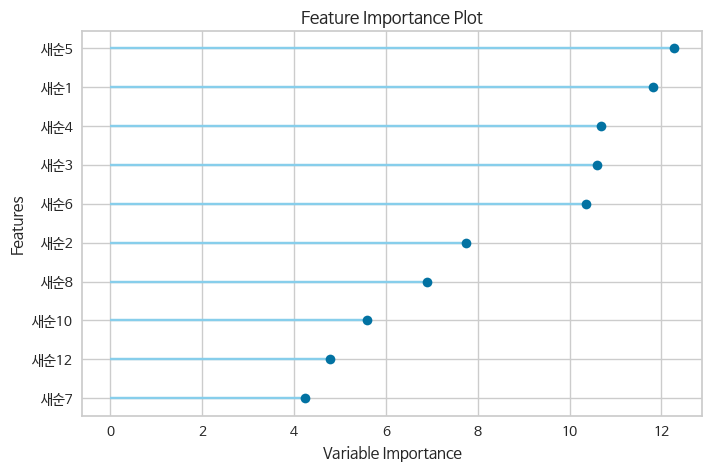

In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(x_train, y_train)

plot_model(catboost, plot = 'feature')

In [ ]:
rf = create_model('rf')
final_model = finalize_model(rf)
predictions = predict_model(final_model, data=test)
predictions['ID'] = submission['ID']
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]
result.to_csv('submission_pycaret_rf.csv', index=False)
result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.5981,1258.8665,35.4805,0.9718,0.3786,0.4162
1,28.8945,1231.1321,35.0875,0.9750,0.1785,0.1248
2,29.9368,1248.8787,35.3395,0.9774,0.4510,0.5543
3,30.9657,1498.8513,38.7150,0.9688,0.4483,0.7976
4,30.4055,1481.2846,38.4875,0.9702,0.3074,0.2640
5,33.5522,2002.6839,44.7514,0.9521,0.2487,0.1613
6,33.4695,1749.0052,41.8211,0.9602,0.3085,0.2395
7,31.6523,1647.0625,40.5840,0.9659,0.2914,0.2263
8,29.5343,1351.9937,36.7695,0.9731,0.2367,0.1497


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,ID,착과량(int)
0,TEST_0000,262.69
1,TEST_0001,747.05
2,TEST_0002,159.55
3,TEST_0003,458.66
4,TEST_0004,703.09
...,...,...
2203,TEST_2203,756.17
2204,TEST_2204,345.49
2205,TEST_2205,384.87
2206,TEST_2206,251.04


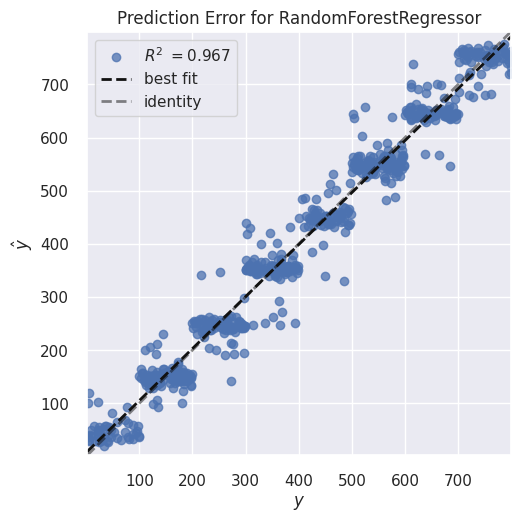

In [ ]:
rf = RandomForestRegressor()

plot_model(rf, plot = 'error')

In [ ]:
lr = create_model('lr')
final_model = finalize_model(lr)
predictions = predict_model(final_model, data=test)
predictions['ID'] = submission['ID']
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]
result.to_csv('submission_pycaret_lr.csv', index=False)
result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.4016,1519.4579,38.9802,0.9660,0.3387,0.3936
1,32.2464,1562.4668,39.5281,0.9682,0.2430,0.1542
2,37.3708,1971.2034,44.3982,0.9643,0.5058,0.7079
3,34.4017,1859.8418,43.1259,0.9613,0.4518,0.8784
4,33.2102,1645.5660,40.5656,0.9669,0.3143,0.3001
5,37.1005,1964.5472,44.3232,0.9530,0.2911,0.2333
6,37.1327,2057.8499,45.3635,0.9531,0.3306,0.2450
7,37.2136,2013.9266,44.8768,0.9583,0.3815,0.3383
8,31.9998,1609.4939,40.1185,0.9680,0.2710,0.1853


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,ID,착과량(int)
0,TEST_0000,864.303528
1,TEST_0001,1298.171875
2,TEST_0002,753.715271
3,TEST_0003,1039.470947
4,TEST_0004,1293.564697
...,...,...
2203,TEST_2203,1345.089355
2204,TEST_2204,868.631348
2205,TEST_2205,923.449768
2206,TEST_2206,749.700073


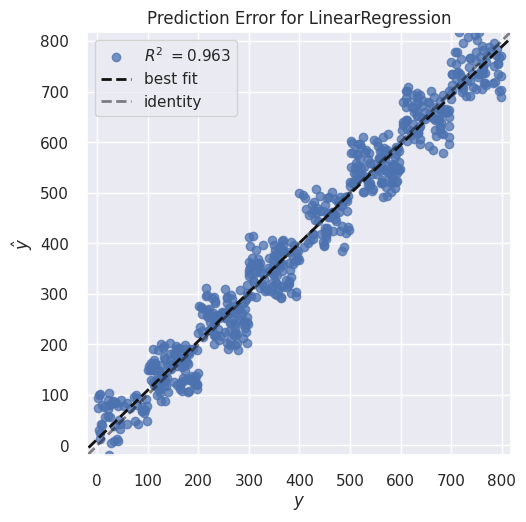

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

plot_model(lr, plot = 'error')

In [ ]:
lasso = create_model('lasso')
final_model = finalize_model(lasso)
predictions = predict_model(final_model, data=test)
predictions['ID'] = submission['ID']
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]
result.to_csv('submission_pycaret_lasso.csv', index=False)
result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.7946,1530.4607,39.1211,0.9658,0.4003,0.6068
1,32.4742,1601.9104,40.0239,0.9674,0.2388,0.1694
2,37.7048,2035.1817,45.1130,0.9631,0.5357,0.7326
3,34.7154,1903.8759,43.6334,0.9604,0.4628,0.8802
4,32.8367,1617.1610,40.2139,0.9675,0.3534,0.2919
5,36.2249,1876.8564,43.3227,0.9551,0.2966,0.2385
6,37.6875,2110.9946,45.9456,0.9519,0.3060,0.2434
7,36.0246,1924.2396,43.8662,0.9602,0.3493,0.3287
8,32.9011,1663.2547,40.7830,0.9669,0.2997,0.1922


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,ID,착과량(int)
0,TEST_0000,280.114380
1,TEST_0001,751.638733
2,TEST_0002,157.877197
3,TEST_0003,445.987793
4,TEST_0004,700.715210
...,...,...
2203,TEST_2203,767.545105
2204,TEST_2204,313.468994
2205,TEST_2205,394.246094
2206,TEST_2206,229.701050


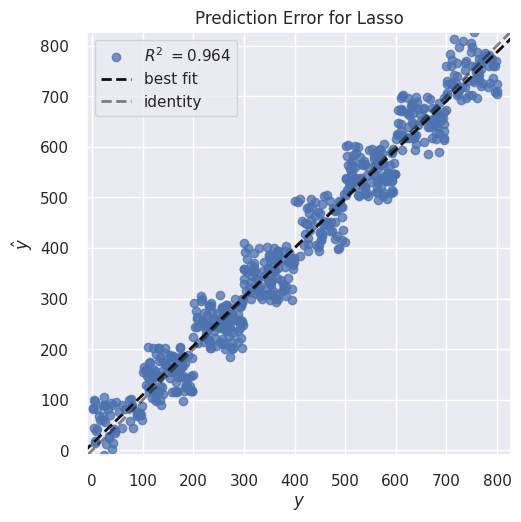

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

plot_model(lasso, plot = 'error')

In [ ]:
ridge = create_model('ridge')
final_model = finalize_model(ridge)
predictions = predict_model(final_model, data=test)
predictions['ID'] = submission['ID']
predictions = predictions.rename(columns={'prediction_label': '착과량(int)'})
result = predictions[['ID', '착과량(int)']]
result.to_csv('submission_pycaret_ridge.csv', index=False)
result

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.2995,1504.6721,38.7901,0.9663,0.3802,0.4864
1,32.6194,1578.8274,39.7345,0.9679,0.2567,0.1604
2,37.1310,1944.9117,44.1012,0.9647,0.5122,0.7291
3,34.2196,1854.6569,43.0657,0.9614,0.5004,0.8513
4,32.6846,1629.7166,40.3697,0.9672,0.3112,0.2935
5,36.5811,1881.5984,43.3774,0.9550,0.2891,0.2322
6,37.3436,2071.0779,45.5091,0.9528,0.3055,0.2378
7,37.1871,1991.0276,44.6209,0.9588,0.4096,0.3293
8,32.3061,1627.7862,40.3458,0.9676,0.2740,0.1961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,ID,착과량(int)
0,TEST_0000,856.164673
1,TEST_0001,1291.406860
2,TEST_0002,745.648193
3,TEST_0003,1026.490356
4,TEST_0004,1282.099487
...,...,...
2203,TEST_2203,1336.061279
2204,TEST_2204,855.517639
2205,TEST_2205,913.777649
2206,TEST_2206,744.104919


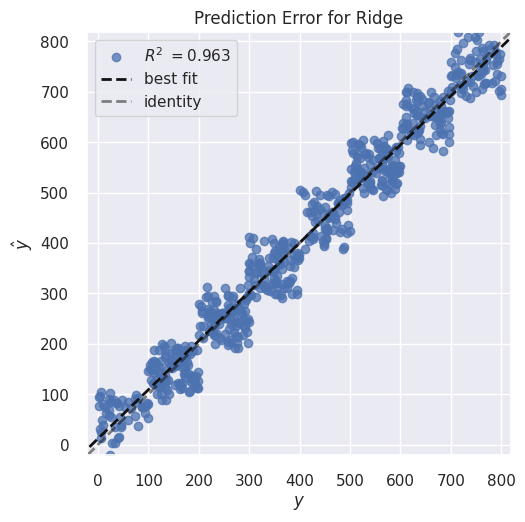

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

plot_model(ridge, plot = 'error')